<a href="https://colab.research.google.com/github/mahejabeen1/Walmart-Web-Scraping-Project/blob/main/Module3_Quiz2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Walmart Web Scraping Project

Purpose

This project aims to scrape the top 10 keywords from the titles of products on Walmart's website and visualize them using a WordCloud. The analysis provides insights into popular keywords found in product titles on Walmart.

Steps to Run the Code

1. Setting Up the Environment


In [115]:
import requests
from bs4 import BeautifulSoup
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

2. Scraping Data

Here we scrape titles from Walmart's website using BeautifulSoap and Structure and organize the data in pandas-dataframe

In [116]:
# Make the HTTP request
url = "https://www.walmart.com"
response = requests.get(url)

# Parse the HTML content with Beautiful Soup
soup = BeautifulSoup(response.text, 'html.parser')

# Remove unwanted elements (script, style, comments, etc.)
for element in soup(['script', 'style', 'comment']):
    element.extract()

#Extract title
data = {'Title': [soup.title.text]}

df = pd.DataFrame(data)
df['Title'] = df['Title'].astype(str)

Split the strings, explode, and count the values

In [117]:
top_keywords = df['Title'].str.split().explode().value_counts().head(10)
print(top_keywords)
unique_words = df['Title'].str.split().explode().unique()
print(unique_words)

Walmart        1
has            1
deals          1
on             1
the            1
most-wanted    1
gifts          1
Name: Title, dtype: int64
['Walmart' 'has' 'deals' 'on' 'the' 'most-wanted' 'gifts']


3. Data Analysis and Visualization

Organizing the data into visualization Charts and print top 10 keywords in the title

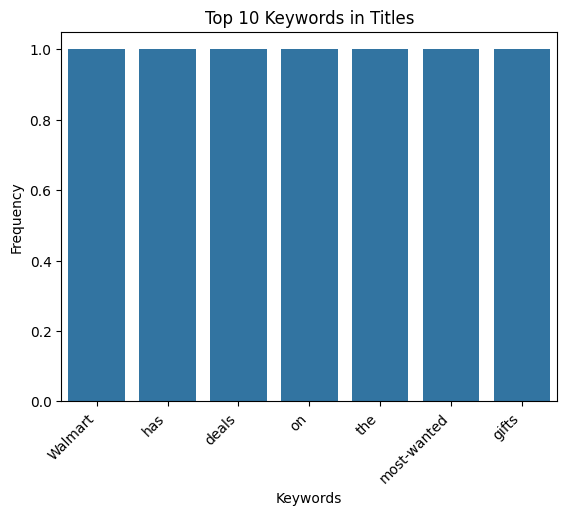

In [118]:
sns.barplot(x=top_keywords.index, y=top_keywords.values)
plt.title('Top 10 Keywords in Titles')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

Here we scrape the visible text from Walmart's website using BeautifulSoap and Structure and organize the data in pandas-dataframe

In [119]:
# Extract the visible text
text = soup.get_text(separator=' ')

# Print the extracted text
print(text)

data = {'Title': [soup.get_text(separator=' ')]}
df = pd.DataFrame(data)

df['Title'] = df['Title'].astype(str)

top_keywords = df['Title'].str.split().explode().value_counts().head(10)
print(top_keywords)

Walmart has deals on the most-wanted gifts Skip to Main Content Departments Services Cancel Reorder My Items Reorder Lists Registries Sign In Account Sign In Create an account Purchase History Walmart+ $0.00 How do you want your items?   Walmart has deals on the most-wanted gifts       Cute & comfy fleece Shop now Shop now   Oh-so-cozy New year finds Shop all Shop all   Set a serene scene Shop home Shop home From $ 12   Up to 40% off Shop now Shop now   Claim offer Join Walmart+ for a year & get $50 Walmart Cash! Limited time. Terms apply. Claim offer   Warm up for winter Shop heaters Shop heaters   Hey planner, get organized Shop now Shop now   Galaxy AI is here Preorder now Preorder now     We’d love to hear what you think! Give feedback All Departments Store Directory Careers Our Company Sell on Walmart.com Help COVID-19 Vaccine Scheduler Product Recalls Accessibility Tax Exempt Program Get the Walmart App Sign-up for Email Safety Data Sheet Terms of Use Privacy & Security Californi

Print top 10 keywords in the visible text and their frequency in a visualization chart

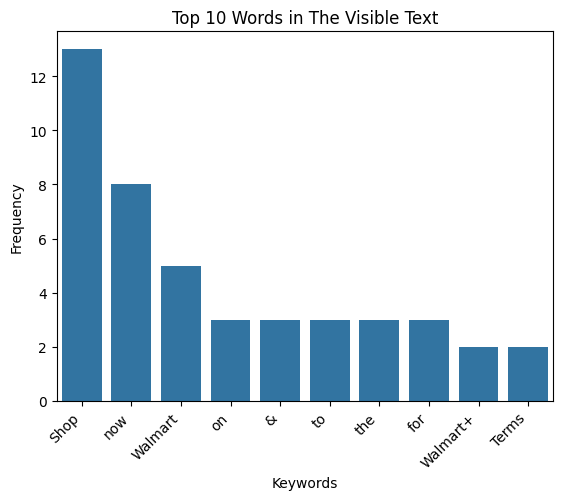

In [120]:
sns.barplot(x=top_keywords.index, y=top_keywords.values)
plt.title('Top 10 Words in The Visible Text')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.show()

4. Conclusion

What we notice is the Walmart's title has only 7 keywords that look to be carefully selected for SEO optimization purpose to be on the top list when an ecommerce customer searches for deals or gifts mainly around yearend holidays time

Visible text on Walmart's website has "Shop" word repeated the most number of times that appeals to the website visitors to Shop many times, increasing the possibility of shopping by the website visitor